In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

trainall=pd.read_csv('./datasets/trainall_v6.csv')

In [3]:
testall=pd.read_csv('./datasets/testall_v6.csv')

In [49]:
trainall.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
0,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,0
1,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,1,0,0
2,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,1,0,0
3,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,1,0,0
4,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,1,0


In [50]:
testall.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,BrkFace,CemntBd,HdBoard,MetalSd,Plywood,PreCast,Stucco,VinylSd,Wd Sdng,WdShing
0,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,0,0
2,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,1,0,0
3,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,1,0
4,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,0,0


In [4]:
trainall.iloc[0:1,113:132]

,BLQ,GLQ,LwQ,Rec,Unf,IR2,IR3,Reg,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
lr=LinearRegression()


In [6]:
features = ['1st Flr SF','Overall Qual', 
            'ClearCr', 'CollgCr', 'Crawfor', 
            'Total Bsmt SF','Gr Liv Area','Bsmt Full Bath',
             'Gilbert', 'GrnHill', 
            'Mitchel', 
            'NAmes', 
            'NWAmes', 
            'NoRidge', 'NridgHt', 'Sawyer', 'Somerst', 'StoneBr', 'Timber', 
            'Veenker',
            'Lot Area','Overall Cond','Year Remod/Add',
            'Bsmt Half Bath','Full Bath','Half Bath','TotRms AbvGrd','Fireplaces','Garage Cars',
            'Garage Area','Open Porch SF','Wood Deck SF','Yr Sold','Pave','sq_ft','age',
            'BrkFace','CemntBd','HdBoard','MetalSd','Stucco','VinylSd',
            'Wd Sdng','WdShing','AsphShn','Reg','IR2',
            'Unf','Unf',
            'GLQ','BLQ'
           ]
#features.extend(train_dummies.columns.drop('Brdale','Greens','OldTown','Blueste'))
print(features)

['1st Flr SF', 'Overall Qual', 'ClearCr', 'CollgCr', 'Crawfor', 'Total Bsmt SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Gilbert', 'GrnHill', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge', 'NridgHt', 'Sawyer', 'Somerst', 'StoneBr', 'Timber', 'Veenker', 'Lot Area', 'Overall Cond', 'Year Remod/Add', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Open Porch SF', 'Wood Deck SF', 'Yr Sold', 'Pave', 'sq_ft', 'age', 'BrkFace', 'CemntBd', 'HdBoard', 'MetalSd', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing', 'AsphShn', 'Reg', 'IR2', 'Unf', 'Unf', 'GLQ', 'BLQ']


In [7]:
X = trainall[features]
y = trainall['SalePrice']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
X_train.shape

(1531, 51)

In [10]:
X_test.shape

(511, 51)

In [11]:
y_train_baseline = [y_train.mean()]*len(y_train)     
y_test_baseline  = [y_train.mean()]*len(y_test)

In [12]:
#RMSE baseline for train
mean_squared_error(y_train, y_train_baseline)**0.5

79088.480809783

In [13]:
#RMSE baseline for test
mean_squared_error(y_test, y_test_baseline)**0.5

79642.59838590655

In [16]:
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
print(f'Train R2 : {lr.score(X_train,y_train)}')
print(f'Test R2 : {lr.score(X_test,y_test)}')

Train R2 : 0.8905948911561984
Test R2 : 0.8526753022282416


In [18]:
cross_val_score(lr,X=X,y=y,cv=5).mean()

0.872663526230283

In [19]:
lr.coef_.mean()

7578.179695257894

In [20]:
lr.intercept_

986189.1147667896

In [21]:
#RMSE for train
mean_squared_error(y_train, lr.predict(X_train))**0.5

26159.65635717508

In [22]:
#RMSE for test
mean_squared_error(y_test, lr.predict(X_test))**0.5

30568.095790005093

NameError: name 'lr' is not defined

In [23]:
#I got this and the next cell from the review Noah did in class
coef_df = pd.DataFrame({
    'column': X.columns,
    'coef'  : lr.coef_
})

In [72]:
coef_df.sort_values(by = 'coef', ascending = False).head(50)

,column,coef
9,GrnHill,1.006114e+05
17,StoneBr,6.091183e+04
14,NridgHt,4.504949e+04
13,NoRidge,3.019117e+04
36,BrkFace,2.087085e+04
18,Timber,2.049632e+04
37,CemntBd,1.888903e+04
4,Crawfor,1.691421e+04
1,Overall Qual,1.277355e+04
43,WdShing,1.246051e+04


In [73]:
ypreds=lr.predict(X)

In [74]:
resids=y-ypreds

''

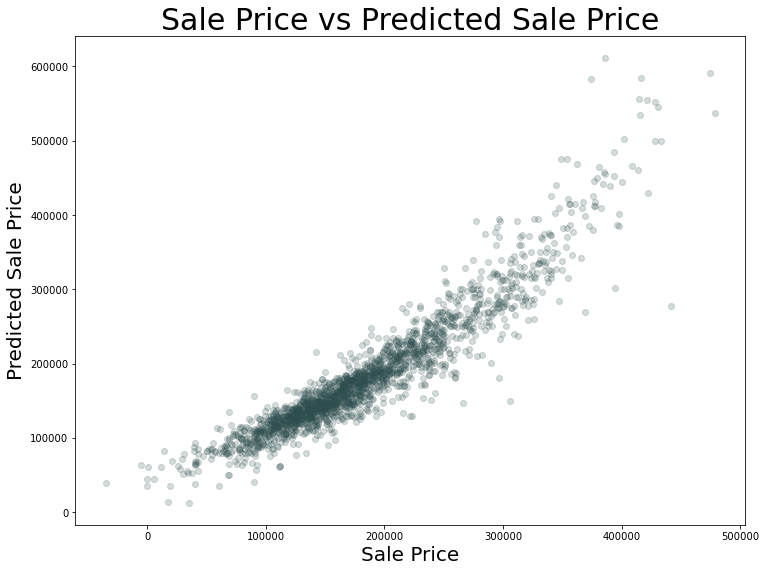

In [75]:
plt.figure(figsize=(12,9))

plt.scatter(ypreds,y,alpha=.2,color='darkslategrey',vmin=-1,vmax=1)
plt.ylabel('Predicted Sale Price',size=20)
plt.xlabel('Sale Price',size=20)
#plt.np.polyfit(ypreds, y, 50)


plt.title('Sale Price vs Predicted Sale Price',size=30)
;


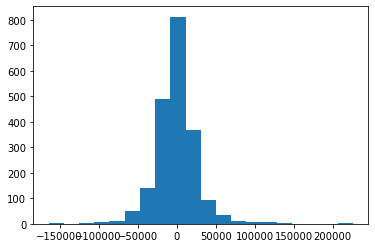

In [76]:
plt.hist(resids,bins=20);

In [79]:
trainall.to_csv('./trainall_mod_v6.csv',index=False)


In [78]:
testall.to_csv('./testall_mod_v6.csv',index=False)

## Continue to Visualizations notebook